In [1476]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

1 Acceso a Internet fijo por rango de velocidad por provincia

In [1477]:
rangos_velocidad_provincia = pd.read_csv("csv/Acceso a Internet fijo por rango de velocidad por provincia.csv")

In [1478]:
rangos_velocidad_provincia

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Fecha_Año-Trimestre
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,12419,3618689,65821,4721668,2022-07-01
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679,2022-07-01
2,2022,3,Catamarca,71,3840,3107,5389,5099,3737,50298,2208,70293,2022-07-01
3,2022,3,Chaco,461,9870,16782,18938,8049,15828,79390,3711,144146,2022-07-01
4,2022,3,Chubut,109,1444,45707,3094,34682,15309,17563,20024,165778,2022-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2014,1,Santa Cruz,161,1625,24972,10,10,0,0,0,26760,2014-01-01
830,2014,1,Santa Fe,8456,124468,345225,20328,6845,230,668,0,506013,2014-01-01
831,2014,1,Santiago Del Estero,1234,10531,22817,2422,1090,0,0,0,37113,2014-01-01
832,2014,1,Tierra Del Fuego,12,6070,30902,60,0,0,0,0,31527,2014-01-01


<AxesSubplot: xlabel='Año', ylabel='HASTA 512 kbps'>

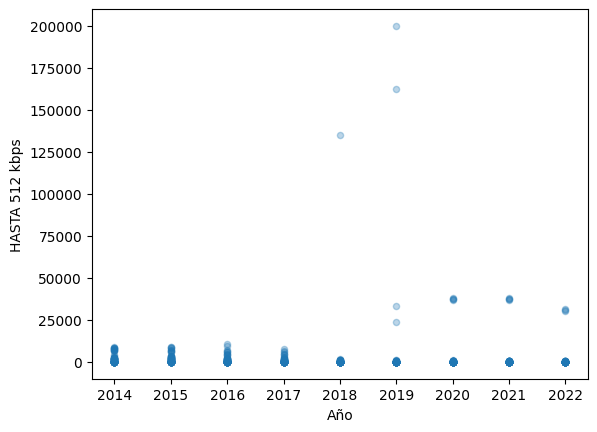

In [1479]:
# genera un gráfico de dispersión que representa la relación entre el año y la cantidad
# de accesos a internet fijo con velocidades de hasta 512 kbps en cada provincia.

rangos_velocidad_provincia.plot(kind = "scatter", x = "Año", y = "HASTA 512 kbps", alpha = 0.3)

In [1480]:
# eliminamos outliers

rangos_velocidad_provincia = rangos_velocidad_provincia[rangos_velocidad_provincia['HASTA 512 kbps'] < 100000]


<AxesSubplot: xlabel='Año', ylabel='HASTA 512 kbps'>

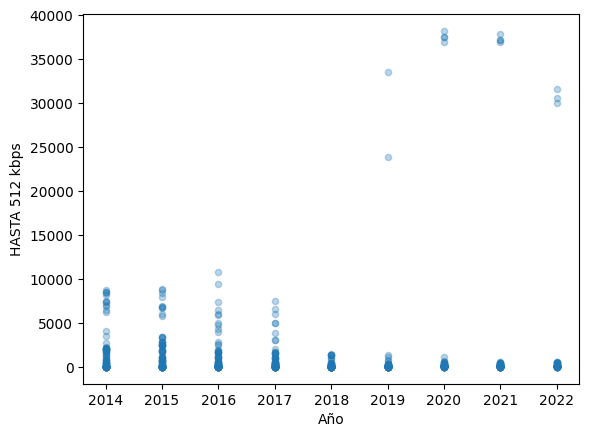

In [1481]:
# genera un gráfico de dispersión que representa la relación entre el año y la cantidad
# de accesos a internet fijo con velocidades de hasta 512 kbps en cada provincia.

rangos_velocidad_provincia.plot(kind = "scatter", x = "Año", y = "HASTA 512 kbps", alpha = 0.3)

<AxesSubplot: xlabel='Año', ylabel='+ 30 Mbps'>

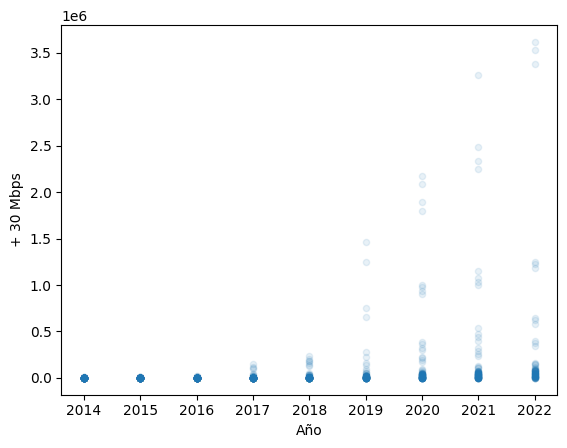

In [1482]:
rangos_velocidad_provincia.plot(kind = "scatter", x = "Año", y = "+ 30 Mbps", alpha = 0.1)

In [1483]:
# conclusion

# El gráfico de dispersión muestra la relación entre el año y el número de accesos a Internet fijo con
# velocidades de descarga de hasta 512 kbps en cada provincia. A partir del gráfico, se puede observar que, 
# en general, ha habido una disminución en el número de accesos a Internet fijo con velocidades de descarga de hasta 512 kbps en todas las 
# provincias durante los últimos años, ademas se puede evidenciar que para las demas velocidades antes aumento número de accesos a Internet fijo 

<function matplotlib.pyplot.show(close=None, block=None)>

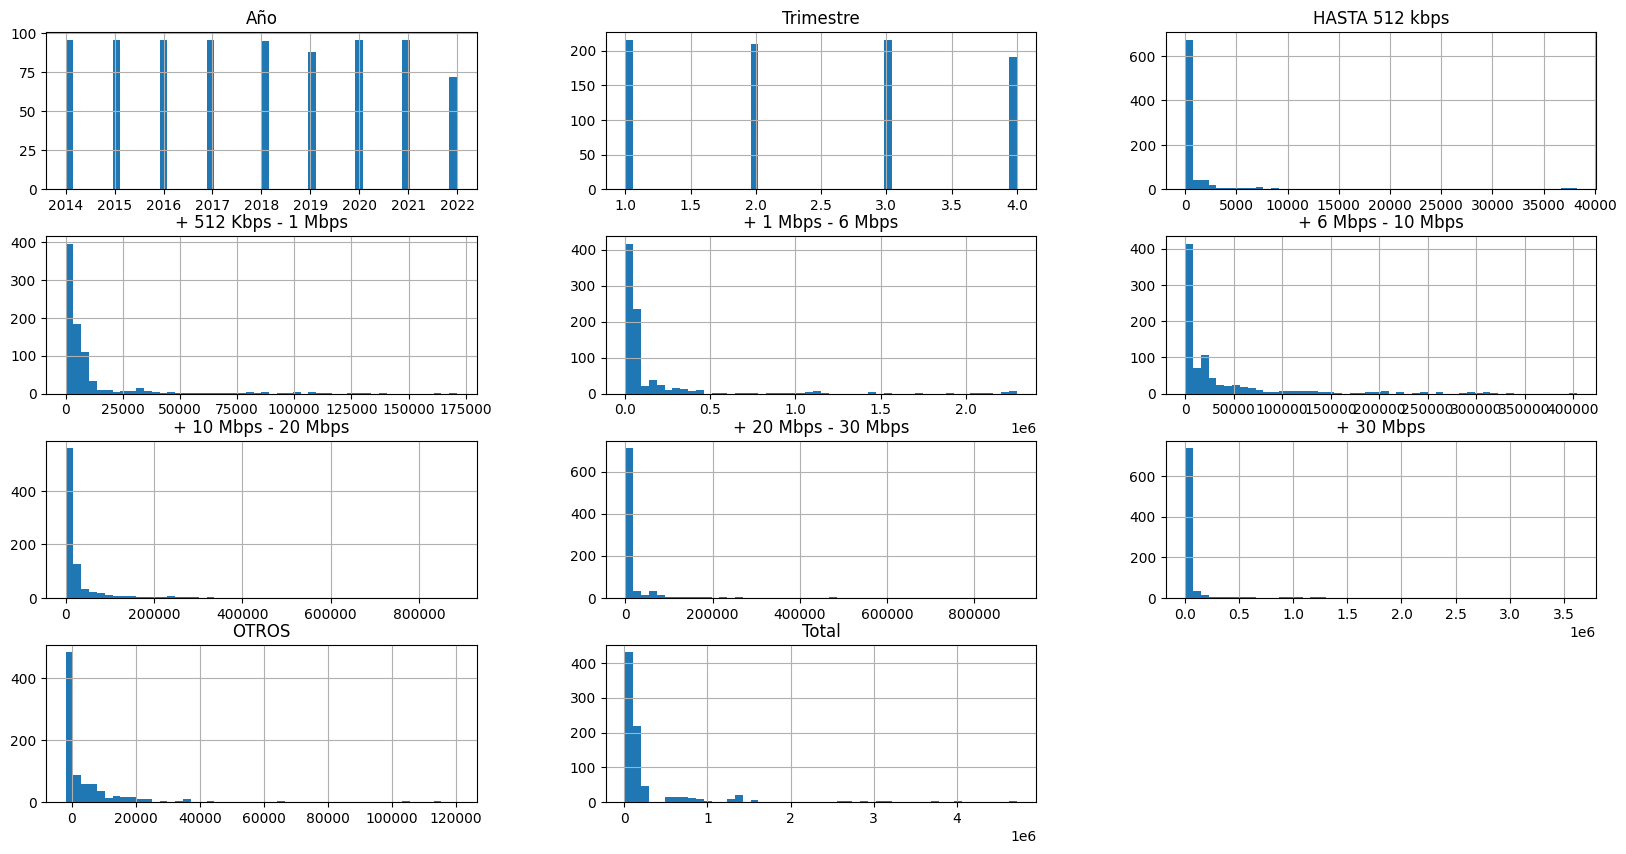

In [1484]:
import matplotlib.pyplot as plt
rangos_velocidad_provincia.hist(bins = 50, figsize = (20,10))
plt.show

In [1485]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [1486]:
# -El código importa el módulo preprocessing de la librería sklearn y crea un objeto de la clase LabelEncoder().

# -LabelEncoder() es una herramienta que se utiliza para codificar etiquetas de valores categóricos en valores numéricos enteros. 
# Por ejemplo, si tenemos una variable "Color" con valores "Rojo", "Verde" y "Azul",
# podemos usar LabelEncoder() para convertir estos valores a 0, 1 y 2, respectivamente.
 
# - La función fit_transform() se utiliza comúnmente junto con LabelEncoder(), 
# lo que permite ajustar el codificador a los datos y transformarlos al mismo tiempo.


In [1487]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

rangos_velocidad_provincia_corr = rangos_velocidad_provincia.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_23688\2478715522.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rangos_velocidad_provincia_corr = rangos_velocidad_provincia.corr()


In [1488]:
# visualizo
rangos_velocidad_provincia_corr

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
Año,1.000000,-0.061261,0.006484,-0.302297,-0.154991,0.144990,0.063361,0.153869,0.254885,0.329556,0.076773
Trimestre,-0.061261,1.000000,-0.005310,-0.043597,-0.002842,0.014076,0.006707,0.005242,0.006921,0.009952,0.006254
HASTA 512 kbps,0.006484,-0.005310,1.000000,0.334295,0.468239,0.478408,0.368123,0.324422,0.798311,0.163334,0.756226
+ 512 Kbps - 1 Mbps,-0.302297,-0.043597,0.334295,1.000000,0.774900,0.411461,0.389611,0.197309,0.081384,0.072175,0.560837
+ 1 Mbps - 6 Mbps,-0.154991,-0.002842,0.468239,0.774900,1.000000,0.646126,0.627180,0.358891,0.217459,0.166715,0.802818
+ 6 Mbps - 10 Mbps,0.144990,0.014076,0.478408,0.411461,0.646126,1.000000,0.728899,0.536638,0.505813,0.350211,0.809616
+ 10 Mbps - 20 Mbps,0.063361,0.006707,0.368123,0.389611,0.627180,0.728899,1.000000,0.587257,0.343591,0.388899,0.732371
+ 20 Mbps - 30 Mbps,0.153869,0.005242,0.324422,0.197309,0.358891,0.536638,0.587257,1.000000,0.391961,0.515803,0.598585
+ 30 Mbps,0.254885,0.006921,0.798311,0.081384,0.217459,0.505813,0.343591,0.391961,1.000000,0.319329,0.726259
OTROS,0.329556,0.009952,0.163334,0.072175,0.166715,0.350211,0.388899,0.515803,0.319329,1.000000,0.386750


<AxesSubplot: >

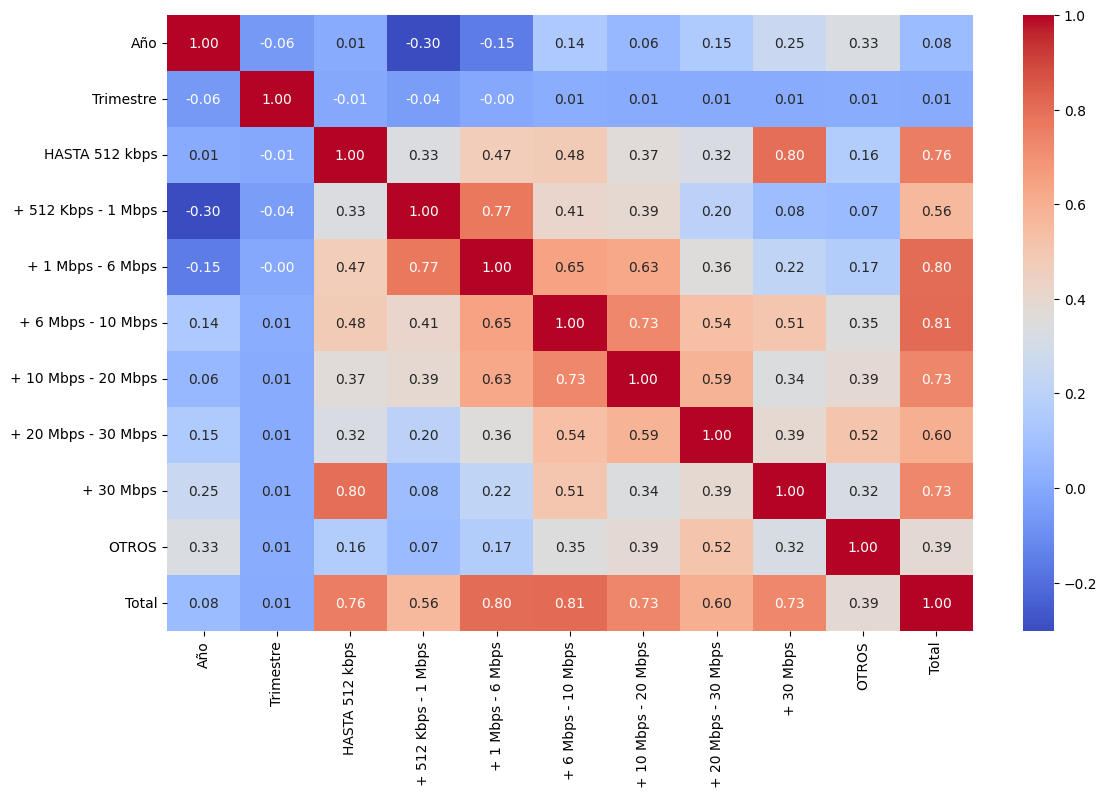

In [1489]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(rangos_velocidad_provincia_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [1490]:
# Resumen de atributos numéricos para variables continuas
rangos_velocidad_provincia.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,831.000000,831.000000,831.000000,831.000000,8.310000e+02,831.000000,831.000000,831.000000,8.310000e+02,831.000000,8.310000e+02
mean,2017.874850,2.460890,1195.000000,10245.902527,1.466356e+05,33188.275572,32757.596871,16845.709988,7.708539e+04,4868.315283,3.318591e+05
std,2.540037,1.107738,4509.290363,21433.524383,3.413487e+05,60090.775498,82190.632912,56612.771477,3.419505e+05,12077.266097,7.111645e+05
min,2014.000000,1.000000,1.000000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,29.000000,1380.500000,2.809050e+04,2931.500000,2019.000000,183.500000,6.500000e+00,0.000000,5.237650e+04
50%,2018.000000,2.000000,106.000000,3801.000000,4.863700e+04,8293.000000,7615.000000,2214.000000,8.690000e+02,0.000000,1.035880e+05
75%,2020.000000,3.000000,449.500000,8325.000000,8.641800e+04,29183.500000,24268.500000,9162.000000,1.937450e+04,5068.000000,1.774810e+05
max,2022.000000,4.000000,38215.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,897964.000000,3.618689e+06,120464.000000,4.721668e+06


In [1491]:
# Conclusion

# En general, la matriz de correlación sugiere que las diferentes velocidades de conexión a internet no están
# fuertemente correlacionadas con el año o el trimestre, pero están correlacionadas entre sí en diferentes grados. 
# Además, hay cierta relación entre la velocidad de conexión de 20 Mbps a 30 Mbps y la categoría "OTROS".

2- Acceso a Internet fijo por tecnologia y provincia

In [1492]:
# nos conectamos a la api

tecnologia_provincia = pd.read_csv("csv/Acceso a Internet fijo por tecnologia y provincia.csv")




In [1493]:
tecnologia_provincia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Fecha_Año-Trimestre
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668,2022-07-01
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679,2022-07-01
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293,2022-07-01
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146,2022-07-01
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778,2022-07-01
...,...,...,...,...,...,...,...,...,...,...
797,2014,1,Santa Cruz,18927,100,381,4092,3264,26764,2014-01-01
798,2014,1,Santa Fe,322662,174296,3059,5951,644,506612,2014-01-01
799,2014,1,Santiago Del Estero,32567,3598,19,915,34,37133,2014-01-01
800,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,28038,2014-01-01


In [1494]:
tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  802 non-null    int64 
 1   Trimestre            802 non-null    int64 
 2   Provincia            802 non-null    object
 3   ADSL                 802 non-null    int64 
 4   Cablemodem           802 non-null    int64 
 5   Fibra óptica         802 non-null    int64 
 6   Wireless             802 non-null    int64 
 7   Otros                802 non-null    int64 
 8   Total                802 non-null    int64 
 9   Fecha_Año-Trimestre  802 non-null    object
dtypes: int64(8), object(2)
memory usage: 62.8+ KB


In [1495]:
#Contamos los nulos por columnas, realizaremos la limpieza directamente en el power uery habiendo identificado aquí donde se encuentran
print(tecnologia_provincia.isna().sum(axis=0))

Año                    0
Trimestre              0
Provincia              0
ADSL                   0
Cablemodem             0
Fibra óptica           0
Wireless               0
Otros                  0
Total                  0
Fecha_Año-Trimestre    0
dtype: int64


<AxesSubplot: xlabel='Año', ylabel='ADSL'>

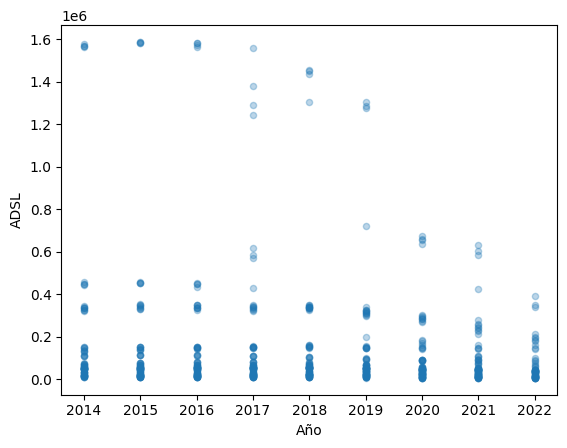

In [1496]:
# genera un gráfico de dispersión que representa la relación entre el año y la adsl


tecnologia_provincia.plot(kind = "scatter", x = "Año", y = "ADSL", alpha = 0.3)

<AxesSubplot: xlabel='Año', ylabel='Fibra óptica'>

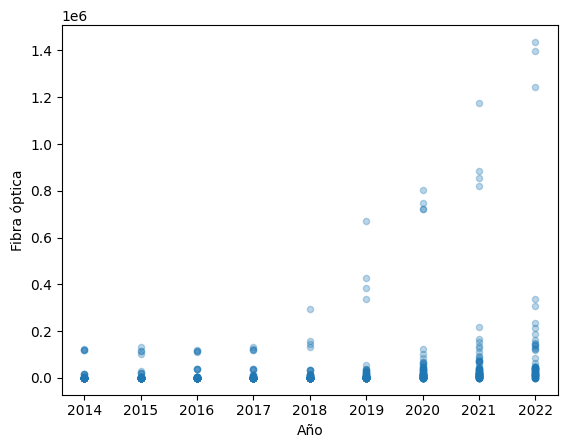

In [1497]:
# genera un gráfico de dispersión que representa la relación entre el año y la fibra optica


tecnologia_provincia.plot(kind = "scatter", x = "Año", y = "Fibra óptica", alpha = 0.3)

In [1498]:
# podemos determinar que el cambio de tecnologia que se ha generado en el pais ha permitido un aumento en acceso por parte de los usuarios 

<function matplotlib.pyplot.show(close=None, block=None)>

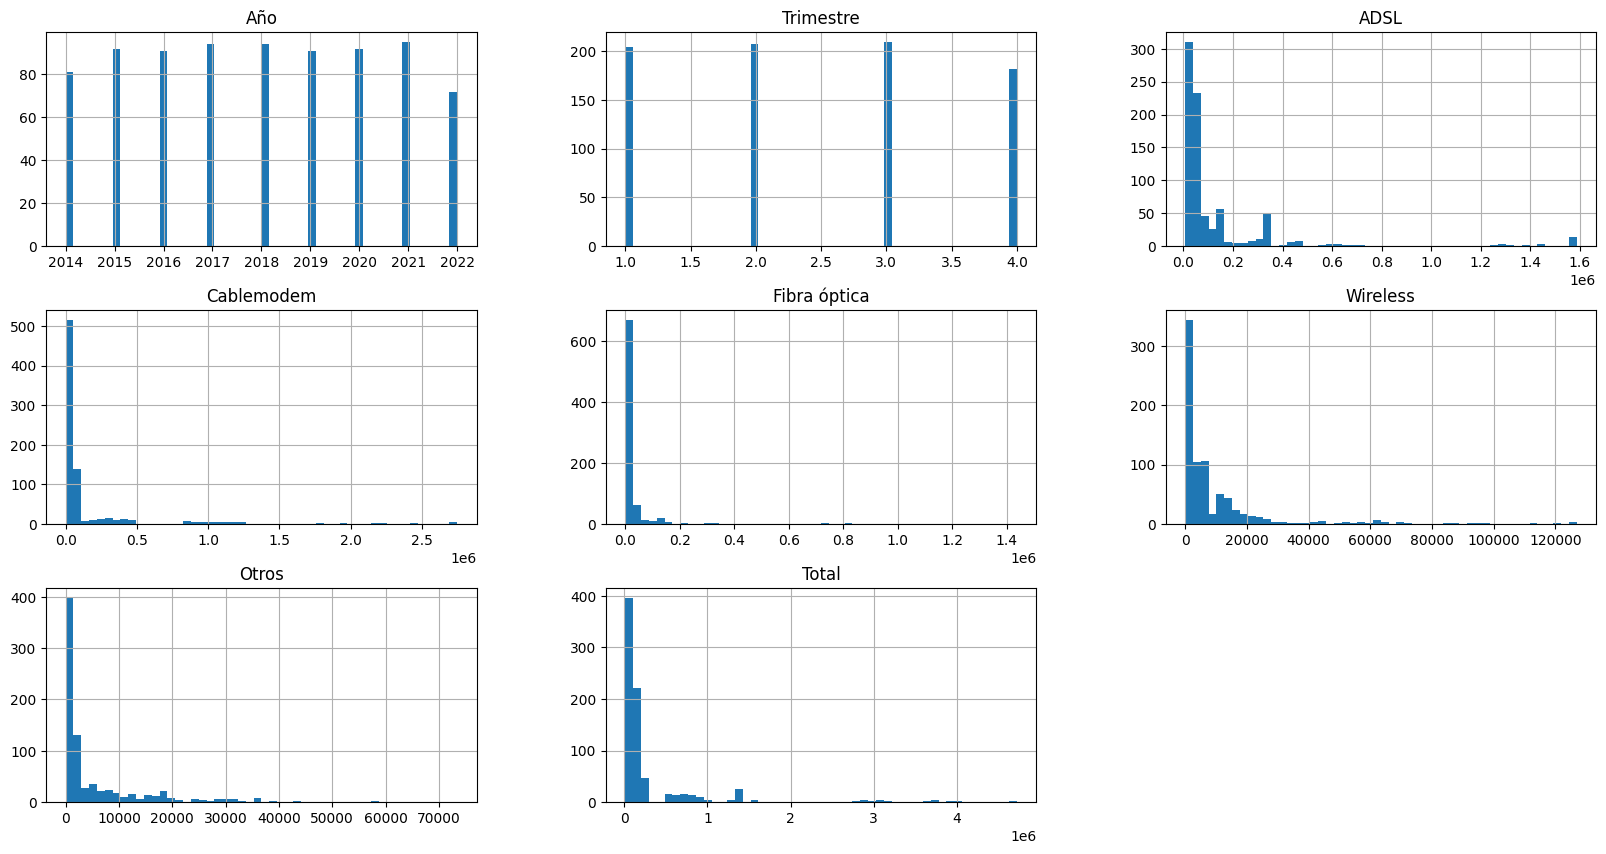

In [1499]:
import matplotlib.pyplot as plt
tecnologia_provincia.hist(bins = 50, figsize = (20,10))
plt.show

In [1500]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

tecnologia_provincia_corr = tecnologia_provincia.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_23688\1414471673.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tecnologia_provincia_corr = tecnologia_provincia.corr()


In [1501]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [1502]:
# visualizo
tecnologia_provincia_corr

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
Año,1.000000,-0.067804,-0.138523,0.108490,0.224078,0.347592,0.283309,0.064698
Trimestre,-0.067804,1.000000,-0.003761,0.005344,0.003260,0.014500,0.018326,0.002873
ADSL,-0.138523,-0.003761,1.000000,0.733901,0.362179,0.345890,0.455946,0.838019
Cablemodem,0.108490,0.005344,0.733901,1.000000,0.784899,0.639859,0.734133,0.979124
Fibra óptica,0.224078,0.003260,0.362179,0.784899,1.000000,0.758552,0.661452,0.766299
Wireless,0.347592,0.014500,0.345890,0.639859,0.758552,1.000000,0.699796,0.643447
Otros,0.283309,0.018326,0.455946,0.734133,0.661452,0.699796,1.000000,0.716698
Total,0.064698,0.002873,0.838019,0.979124,0.766299,0.643447,0.716698,1.000000


<AxesSubplot: >

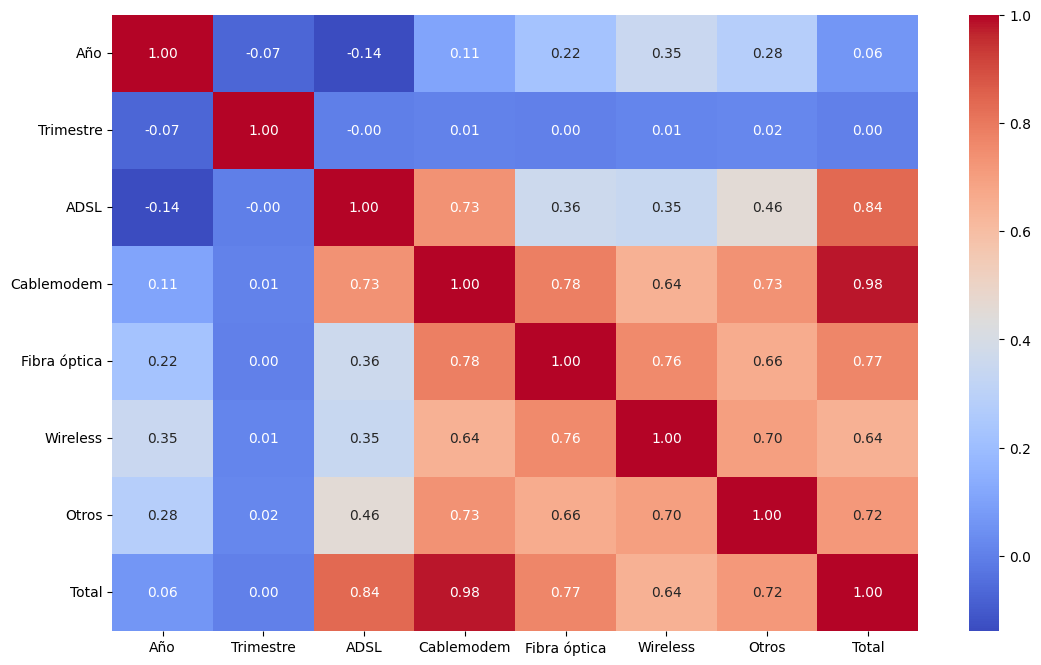

In [1503]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(tecnologia_provincia_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [1504]:
# Resumen de atributos numéricos para variables continuas
tecnologia_provincia_corr.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.227730,0.121592,0.449206,0.623219,0.570090,0.556204,0.571207,0.626395
std,0.353786,0.355955,0.397222,0.371545,0.337549,0.305736,0.306618,0.385651
min,-0.138523,-0.067804,-0.138523,0.005344,0.003260,0.014500,0.018326,0.002873
25%,0.031572,0.001215,0.258477,0.507016,0.327654,0.347167,0.412787,0.498760
50%,0.166284,0.004302,0.409063,0.734017,0.710002,0.641653,0.680624,0.741498
75%,0.299379,0.015456,0.759931,0.833455,0.770949,0.714485,0.721056,0.873295
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1505]:
# conclusiones 

# En general, la tabla sugiere que hay una fuerte relación entre el Cablemodem, el Total y las demás variables, 
# mientras que el año y el trimestre no parecen ser factores importantes para explicar las variaciones en las variables

3- Accesos a Internet fijo por tecnología y localidad

In [1506]:
tecnologia_localidad = pd.read_csv("csv/Accesos a Internet fijo por tecnología y localidad.csv")

In [1507]:
tecnologia_localidad

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,975,0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,1,0,471,0,0,0,0,472
3066,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,313,313
3067,TUCUMAN,Trancas,Villa de Trancas,90112030,150,0,0,0,33,0,0,99,282
3068,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1725,0,0,0,1,0,0,97,1823


<AxesSubplot: xlabel='Provincia', ylabel='CABLEMODEM'>

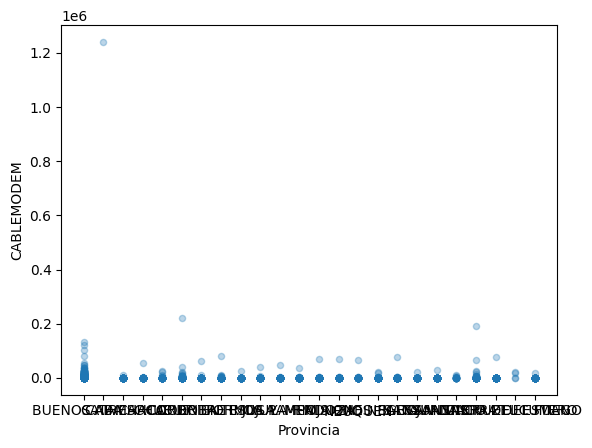

In [1508]:
# genera un gráfico de dispersión que representa la relación entre el provincia  y las demas variables a probar 

tecnologia_localidad.plot(kind = "scatter", x = "Provincia", y = "CABLEMODEM", alpha = 0.3)

<AxesSubplot: xlabel='Provincia', ylabel='FIBRA OPTICA'>

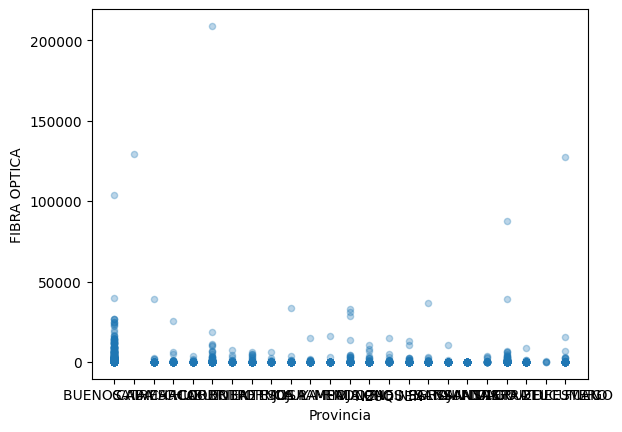

In [1509]:
# genera un gráfico de dispersión que representa la relación entre el provincia  y las demas variables a probar 

tecnologia_localidad.plot(kind = "scatter", x = "Provincia", y = "FIBRA OPTICA", alpha = 0.3)

<AxesSubplot: xlabel='Provincia', ylabel='WIRELESS'>

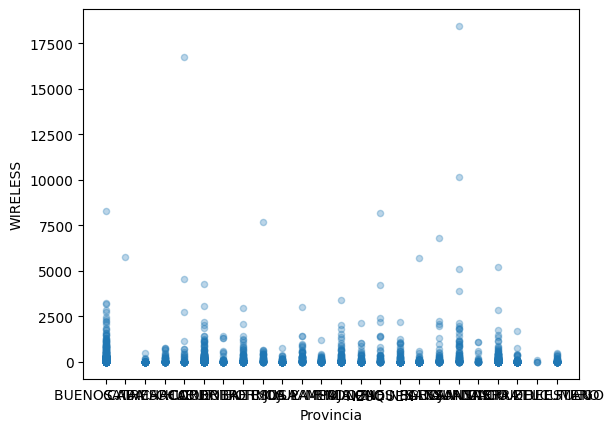

In [1510]:
# genera un gráfico de dispersión que representa la relación entre el provincia  y las demas variables a probar 

tecnologia_localidad.plot(kind = "scatter", x = "Provincia", y = "WIRELESS", alpha = 0.3)


In [1511]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

tecnologia_localidad_corr = tecnologia_localidad.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_23688\554585429.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tecnologia_localidad_corr = tecnologia_localidad.corr()


In [1512]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [1513]:
tecnologia_localidad_corr

,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
Link Indec,1.000000,-0.018602,-0.055833,-0.055707,-0.072168,-0.008705,-0.015031,-0.043368,0.002740,-0.058285
ADSL,-0.018602,1.000000,0.873459,0.771749,0.750928,0.665057,0.068438,0.004943,0.347351,0.929944
CABLEMODEM,-0.055833,0.873459,1.000000,0.900776,0.594383,0.736893,0.066881,0.006050,0.241653,0.980583
DIAL UP,-0.055707,0.771749,0.900776,1.000000,0.500939,0.733482,0.068064,-0.001015,0.314663,0.878865
FIBRA OPTICA,-0.072168,0.750928,0.594383,0.500939,1.000000,0.338408,0.042546,-0.003064,0.248531,0.734055
OTROS,-0.008705,0.665057,0.736893,0.733482,0.338408,1.000000,0.047769,-0.001721,0.272258,0.717413
SATELITAL,-0.015031,0.068438,0.066881,0.068064,0.042546,0.047769,1.000000,-0.001422,0.051876,0.068468
WIMAX,-0.043368,0.004943,0.006050,-0.001015,-0.003064,-0.001721,-0.001422,1.000000,-0.003500,0.004803
WIRELESS,0.002740,0.347351,0.241653,0.314663,0.248531,0.272258,0.051876,-0.003500,1.000000,0.294314
Total general,-0.058285,0.929944,0.980583,0.878865,0.734055,0.717413,0.068468,0.004803,0.294314,1.000000


<AxesSubplot: >

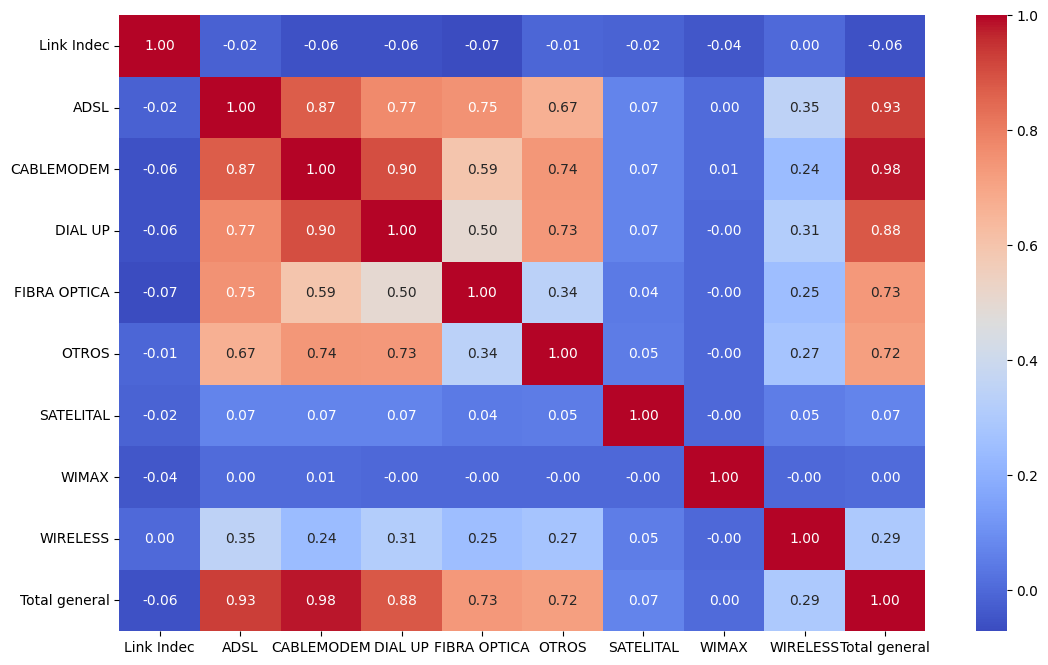

In [1514]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(tecnologia_localidad_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [1515]:
# Resumen de atributos numéricos para variables continuas
tecnologia_localidad_corr.describe()

,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.067504,0.539327,0.534484,0.511181,0.413456,0.450085,0.139759,0.096171,0.276989,0.555016
std,0.328599,0.400901,0.427065,0.403046,0.362218,0.365639,0.303711,0.317893,0.285979,0.430318
min,-0.072168,-0.018602,-0.055833,-0.055707,-0.072168,-0.008705,-0.015031,-0.043368,-0.003500,-0.058285
25%,-0.055802,0.138167,0.110574,0.129713,0.094043,0.103892,0.043852,-0.002729,0.099321,0.124930
50%,-0.030985,0.707992,0.665638,0.617210,0.419674,0.501732,0.059379,-0.001219,0.260395,0.725734
75%,-0.010286,0.848032,0.893947,0.852086,0.699137,0.729465,0.068345,0.004908,0.309576,0.917174
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4  Acceso a Internet, cada 100 hogares por provincia

In [1516]:
internet_provincia_100hogares = pd.read_csv("csv/Acceso a Internet, cada 100 hogares por provincia.csv")

In [1517]:
internet_provincia_100hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Fecha_Año-Trimestre
0,2022,3,Buenos Aires,"78,11",2022-07-01
1,2022,3,Capital Federal,"122,28",2022-07-01
2,2022,3,Catamarca,"65,33",2022-07-01
3,2022,3,Chaco,"43,86",2022-07-01
4,2022,3,Chubut,"84,38",2022-07-01
...,...,...,...,...,...
835,2014,1,Santa Cruz,"28,94",2014-01-01
836,2014,1,Santa Fe,"47,85",2014-01-01
837,2014,1,Santiago Del Estero,"16,31",2014-01-01
838,2014,1,Tierra Del Fuego,"63,97",2014-01-01


In [1518]:
internet_provincia_100hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
 4   Fecha_Año-Trimestre           840 non-null    object
dtypes: int64(2), object(3)
memory usage: 32.9+ KB


<AxesSubplot: xlabel='Año', ylabel='Accesos por cada 100 hogares'>

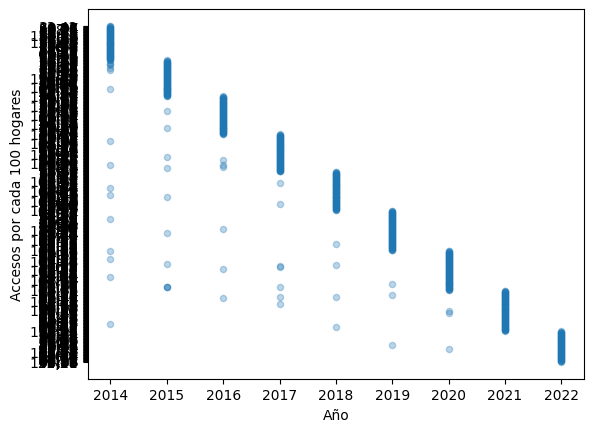

In [1519]:
 # genera un gráfico de dispersión

internet_provincia_100hogares.plot(kind = "scatter", x = "Año", y = "Accesos por cada 100 hogares", alpha = 0.3)

<AxesSubplot: xlabel='Provincia', ylabel='Accesos por cada 100 hogares'>

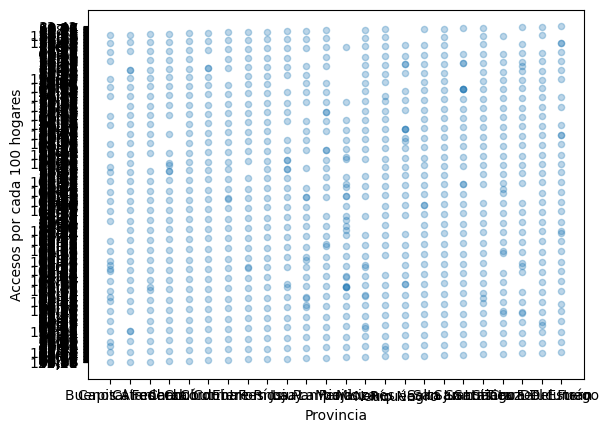

In [1520]:
 # genera un gráfico de dispersión

internet_provincia_100hogares.plot(kind = "scatter", x = "Provincia", y = "Accesos por cada 100 hogares", alpha = 0.3)

In [1521]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

internet_provincia_100hogares_corr = internet_provincia_100hogares.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_23688\1879957099.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  internet_provincia_100hogares_corr = internet_provincia_100hogares.corr()


In [1522]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [1523]:
internet_provincia_100hogares_corr

,Año,Trimestre
Año,1.000000,-0.063178
Trimestre,-0.063178,1.000000


<AxesSubplot: >

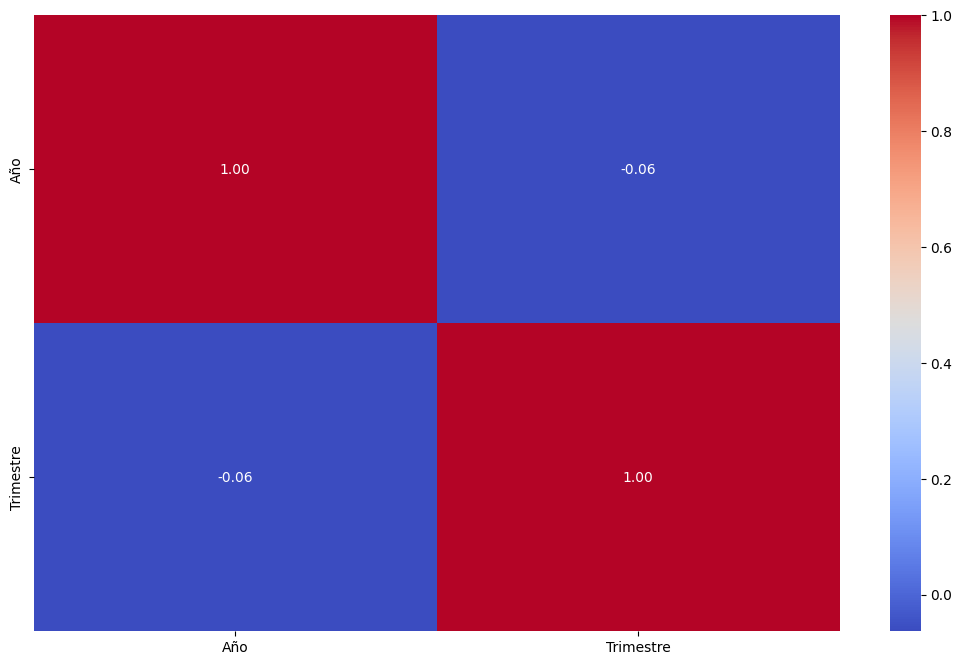

In [1524]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(internet_provincia_100hogares_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [1525]:
# Resumen de atributos numéricos para variables continuas
internet_provincia_100hogares.describe()

,Año,Trimestre
count,840.000000,840.000000
mean,2017.885714,2.457143
std,2.528745,1.105009
min,2014.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


5 calendario 

In [1526]:
calendario = pd.read_csv("csv/calendario.csv")

In [1527]:
calendario

,Fecha_Año-Trimestre,Año,Trimestre
0,2014-01-01,2014,1
1,2014-01-02,2014,1
2,2014-01-03,2014,1
3,2014-01-04,2014,1
4,2014-01-05,2014,1
...,...,...,...
3282,2022-12-27,2022,4
3283,2022-12-28,2022,4
3284,2022-12-29,2022,4
3285,2022-12-30,2022,4


**6  Ingresos trimestrales por la prestación del servicio de Internet fijo**

In [1528]:
ingresos_miles_pesos = pd.read_csv("csv/Ingresos trimestrales por la prestación del servicio de Internet fijo.csv")



In [1529]:
ingresos_miles_pesos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Fecha_Año-Trimestre
0,2022,3,67055930,Jul-Sept 2022,2022-07-01
1,2022,2,60335724,Abr-Jun 2022,2022-04-01
2,2022,1,55589997,Ene-Mar 2022,2022-01-01
3,2021,4,45467887,Oct-Dic 2021,2021-10-01
4,2021,3,42999944,Jul-Sept 2021,2021-07-01


<AxesSubplot: xlabel='Año', ylabel='Ingresos (miles de pesos)'>

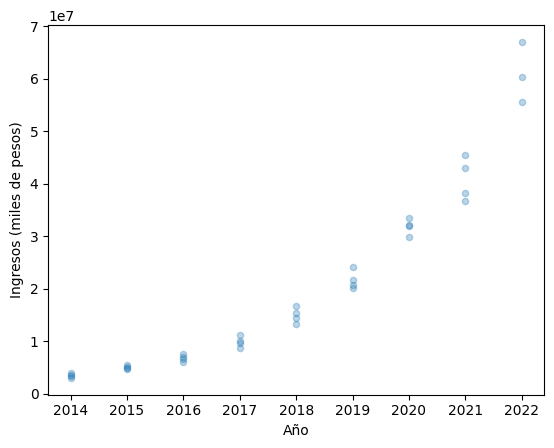

In [1530]:
# genera un gráfico de dispersión

ingresos_miles_pesos.plot(kind = "scatter", x = "Año", y = "Ingresos (miles de pesos)", alpha = 0.3)

In [1531]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

ingresos_miles_pesos_corr = ingresos_miles_pesos.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_23688\2802489162.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ingresos_miles_pesos_corr = ingresos_miles_pesos.corr()


In [1532]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [1533]:
ingresos_miles_pesos_corr

,Año,Trimestre,Ingresos (miles de pesos)
Año,1.000000,-0.063178,0.929619
Trimestre,-0.063178,1.000000,-0.010465
Ingresos (miles de pesos),0.929619,-0.010465,1.000000


<AxesSubplot: >

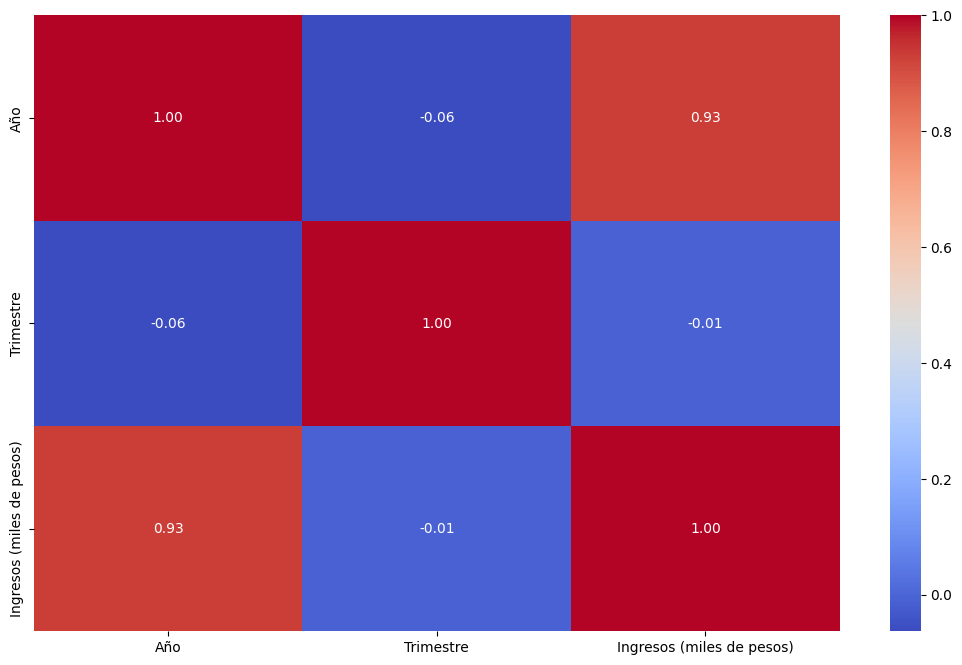

In [1534]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(ingresos_miles_pesos_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [1535]:
# Resumen de atributos numéricos para variables continuas
ingresos_miles_pesos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,2.058845e+07
std,2.564135,1.120474,1.774214e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.500000,6.235543e+06
50%,2018.000000,2.000000,1.431947e+07
75%,2020.000000,3.000000,3.204996e+07
max,2022.000000,4.000000,6.705593e+07


In [1536]:
#Contamos los nulos por columnas, realizaremos la limpieza directamente en el power uery habiendo identificado aquí donde se encuentran
print(rangos_velocidad_provincia.isna().sum(axis=0))

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
Fecha_Año-Trimestre    0
dtype: int64


7- Listado de localidades con conectividad a internet

In [1537]:
localidades_conectividad = pd.read_csv("csv/Listado de localidades con conectividad a internet.csv")


In [1538]:
localidades_conectividad

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL,conectividad
0,BUENOS AIRES,Balcarce,Balcarce,0,1,1,1,0,1,1,1,0,SI
1,BUENOS AIRES,NaN,San Agustín,0,0,0,0,0,0,0,0,0,NO
2,BUENOS AIRES,Baradero,Baradero,0,0,0,1,0,1,1,1,1,SI
3,BUENOS AIRES,NaN,Villa Alsina (Est. Alsina),1,0,0,0,1,1,0,1,0,SI
4,BUENOS AIRES,General Las Heras,La Choza,0,0,0,0,0,0,0,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,CHUBUT,Escalante,Barrio Villa S.U.P.E.,0,0,0,0,0,1,0,0,0,SI
1438,CHACO,NaN,La Clotilde,0,0,0,0,1,0,0,0,0,SI
1439,CHACO,Presidencia de la Plaza,Presidencia de la Plaza,0,1,0,1,0,0,1,0,0,SI
1440,CHACO,NaN,Villa El Palmar,0,0,0,0,1,0,0,1,0,SI


In [1539]:
#Contamos los nulos por columnas
print(localidades_conectividad.isna().sum())

Provincia          0
Partido          711
Localidad          0
ADSL               0
CABLEMODEM         0
DIALUP             0
FIBRAOPTICA        0
4G                 0
3G                 0
TELEFONIAFIJA      0
WIRELESS           0
SATELITAL          0
conectividad       0
dtype: int64


In [1540]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

localidades_conectividad_corr = localidades_conectividad.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_23688\758953302.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  localidades_conectividad_corr = localidades_conectividad.corr()


In [1541]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [1542]:
localidades_conectividad_corr

,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
ADSL,1.000000,0.276027,-0.085374,0.232070,0.529539,0.329191,-0.208492,0.141080,0.072544
CABLEMODEM,0.276027,1.000000,0.284993,0.395164,0.201910,0.395290,0.236740,0.134814,0.117018
DIALUP,-0.085374,0.284993,1.000000,0.265082,-0.146392,0.183357,0.409484,0.121844,0.075491
FIBRAOPTICA,0.232070,0.395164,0.265082,1.000000,0.169331,0.373494,0.280120,0.132511,0.180080
4G,0.529539,0.201910,-0.146392,0.169331,1.000000,0.382892,-0.357503,0.100030,0.090092
3G,0.329191,0.395290,0.183357,0.373494,0.382892,1.000000,0.188475,0.147712,0.148922
TELEFONIAFIJA,-0.208492,0.236740,0.409484,0.280120,-0.357503,0.188475,1.000000,0.192597,0.129905
WIRELESS,0.141080,0.134814,0.121844,0.132511,0.100030,0.147712,0.192597,1.000000,0.022631
SATELITAL,0.072544,0.117018,0.075491,0.180080,0.090092,0.148922,0.129905,0.022631,1.000000


8  Velocidad media de bajada por provincia

In [1543]:
velocidad_media_provincia = pd.read_csv("csv/Velocidad media de bajada por provincia.csv")

In [1544]:
velocidad_media_provincia

,Año,Trimestre,Provincia,Mbps (Media de bajada),Fecha_Año-Trimestre
0,2022,3,Buenos Aires,70,2022-07-01
1,2022,3,Capital Federal,101,2022-07-01
2,2022,3,Catamarca,61,2022-07-01
3,2022,3,Chaco,53,2022-07-01
4,2022,3,Chubut,16,2022-07-01
...,...,...,...,...,...
835,2014,1,Santa Cruz,3,2014-01-01
836,2014,1,Santa Fe,3,2014-01-01
837,2014,1,Santiago Del Estero,3,2014-01-01
838,2014,1,Tierra Del Fuego,3,2014-01-01


<AxesSubplot: xlabel='Año', ylabel='Mbps (Media de bajada)'>

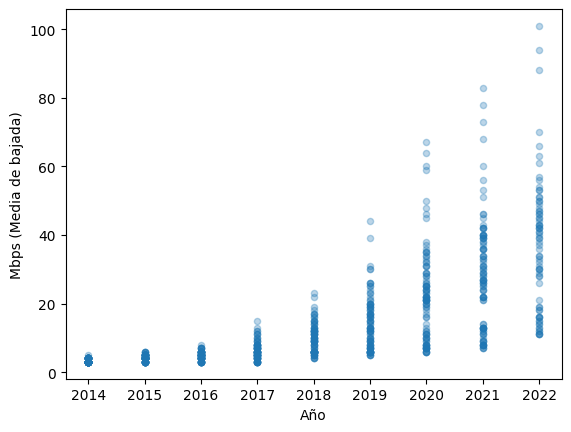

In [1545]:
# genera un gráfico de dispersión

velocidad_media_provincia.plot(kind = "scatter", x = "Año", y = "Mbps (Media de bajada)", alpha = 0.3)

In [1546]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

velocidad_media_provincia_corr = velocidad_media_provincia.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_23688\2242924907.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  velocidad_media_provincia_corr = velocidad_media_provincia.corr()


In [1547]:
velocidad_media_provincia_corr

,Año,Trimestre,Mbps (Media de bajada)
Año,1.000000,-0.063178,0.704391
Trimestre,-0.063178,1.000000,0.017706
Mbps (Media de bajada),0.704391,0.017706,1.000000


In [1548]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

<AxesSubplot: >

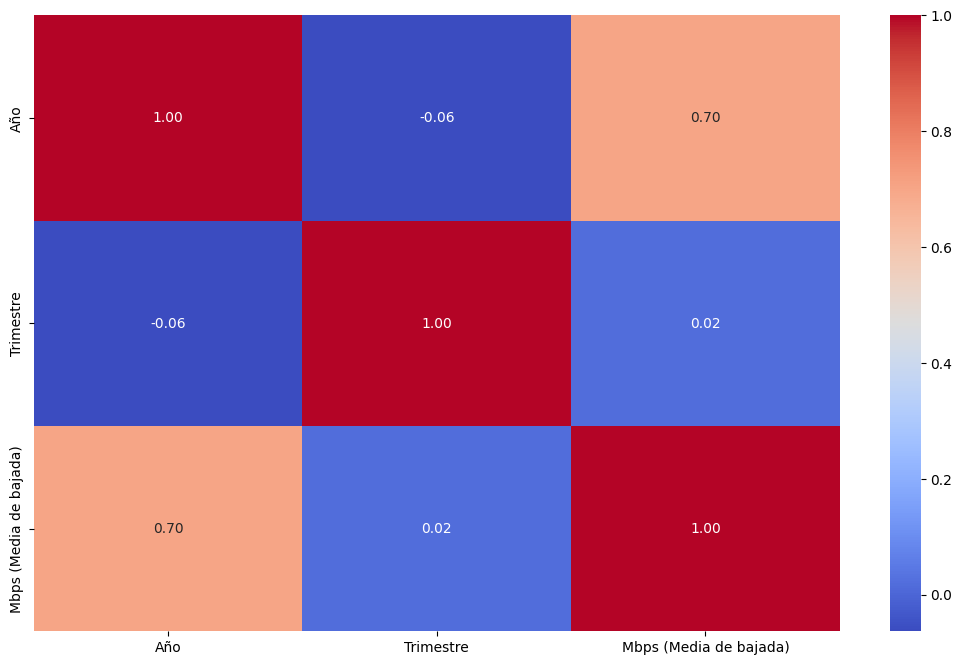

In [1549]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(velocidad_media_provincia_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [1550]:
# Resumen de atributos numéricos para variables continuas
velocidad_media_provincia_corr.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,3.000000,3.000000,3.000000
mean,0.547071,0.318176,0.574032
std,0.548770,0.591860,0.503955
min,-0.063178,-0.063178,0.017706
25%,0.320607,-0.022736,0.361048
50%,0.704391,0.017706,0.704391
75%,0.852195,0.508853,0.852195
max,1.000000,1.000000,1.000000


 **9  Accesos TV por suscripcion y TV satelital**

In [1551]:
TV_suscripcion_satelita = pd.read_csv("csv/Accesos TV por suscripcion y TV satelital.csv")

In [1552]:
TV_suscripcion_satelita.head()

,Año,Trimestre,Accesos TV por suscripción,Accesos TV satelital,Periodo,Fecha_Año-Trimestre
0,2022,3,7665931,2064699,Jul-Sept 2022,2022-07-01
1,2022,2,7647584,2064637,Abr-Jun 2022,2022-04-01
2,2022,1,7564827,2049628,Ene-Mar 2022,2022-01-01
3,2021,4,7596758,2010217,Oct-Dic 2021,2021-10-01
4,2021,3,7676892,2147571,Jul-Sept 2021,2021-07-01


In [1553]:
TV_suscripcion_satelita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Año                         34 non-null     int64 
 1   Trimestre                   34 non-null     int64 
 2   Accesos TV por suscripción  34 non-null     int64 
 3   Accesos TV satelital        34 non-null     int64 
 4   Periodo                     34 non-null     object
 5   Fecha_Año-Trimestre         34 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.7+ KB


<AxesSubplot: xlabel='Año', ylabel='Accesos TV por suscripción'>

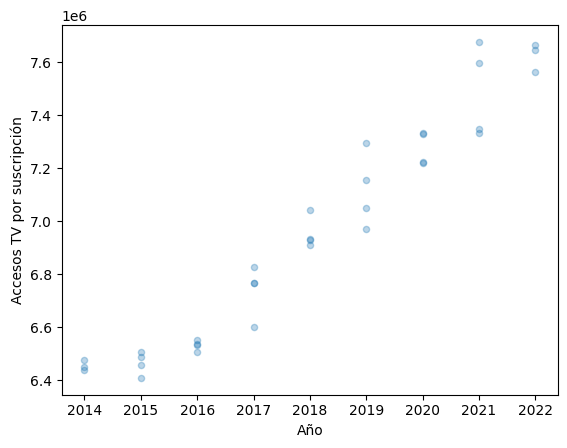

In [1554]:
# genera un gráfico de dispersión

TV_suscripcion_satelita.plot(kind = "scatter", x = "Año", y = "Accesos TV por suscripción", alpha = 0.3)

<AxesSubplot: xlabel='Año', ylabel='Accesos TV satelital'>

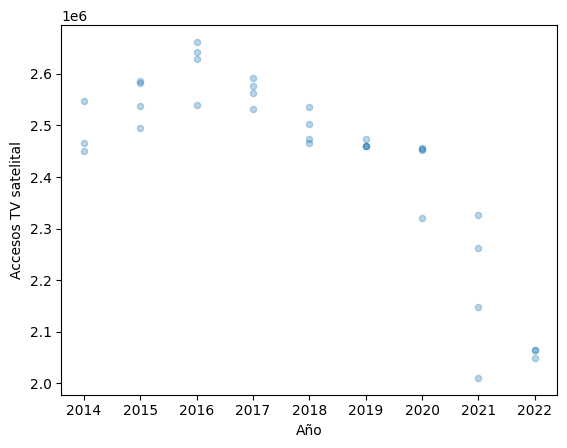

In [1555]:
# genera un gráfico de dispersión

TV_suscripcion_satelita.plot(kind = "scatter", x = "Año", y = "Accesos TV satelital", alpha = 0.3)

In [1556]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

TV_suscripcion_satelita_coor = TV_suscripcion_satelita.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_23688\3337716090.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  TV_suscripcion_satelita_coor = TV_suscripcion_satelita.corr()


In [1557]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [1558]:
TV_suscripcion_satelita_coor

,Año,Trimestre,Accesos TV por suscripción,Accesos TV satelital
Año,1.000000,-0.130744,0.970386,-0.778169
Trimestre,-0.130744,1.000000,0.018531,0.032179
Accesos TV por suscripción,0.970386,0.018531,1.000000,-0.835045
Accesos TV satelital,-0.778169,0.032179,-0.835045,1.000000


<AxesSubplot: >

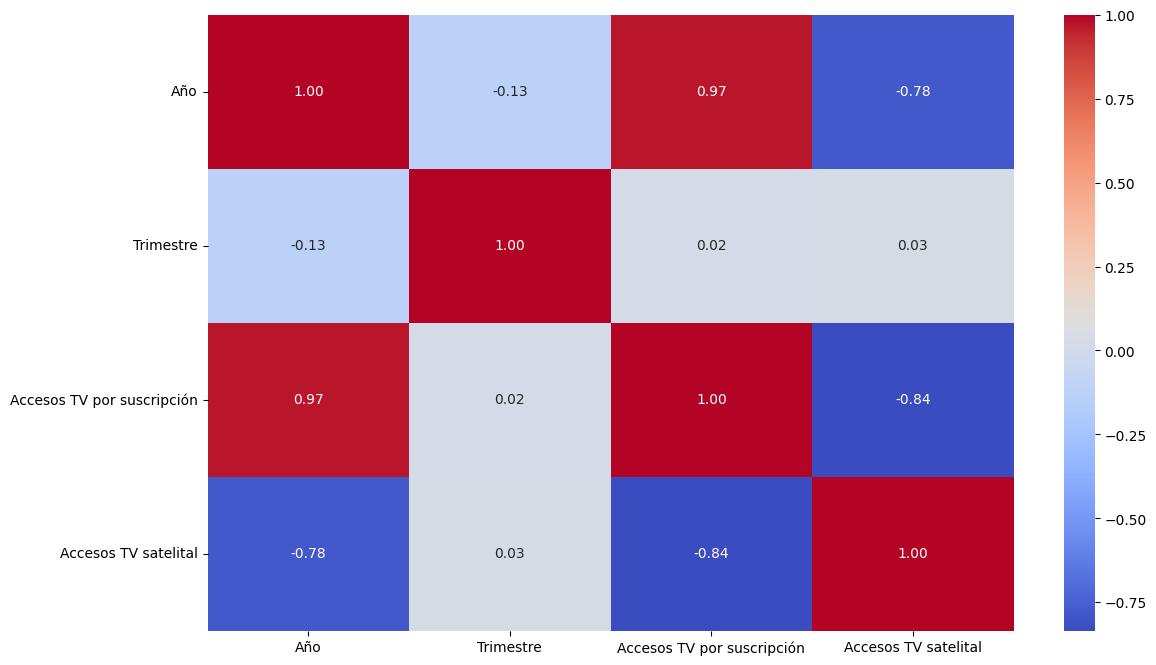

In [1559]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(TV_suscripcion_satelita_coor, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [1560]:
# Resumen de atributos numéricos para variables continuas
TV_suscripcion_satelita.describe()

,Año,Trimestre,Accesos TV por suscripción,Accesos TV satelital
count,34.000000,34.000000,3.400000e+01,3.400000e+01
mean,2018.000000,2.500000,6.957595e+06,2.436502e+06
std,2.510584,1.107823,4.201176e+05,1.782250e+05
min,2014.000000,1.000000,6.409504e+06,2.010217e+06
25%,2016.000000,2.000000,6.535381e+06,2.450491e+06
50%,2018.000000,2.500000,6.931469e+06,2.470013e+06
75%,2020.000000,3.000000,7.321121e+06,2.544929e+06
max,2022.000000,4.000000,7.676892e+06,2.662031e+06
